# Even More DNNs
John Ignacio R.M. 2020-05-18

In [1]:
import pandas as pd
from glob import glob
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
import ada
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import sgd, adam, adagrad, adadelta
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from keras.models import model_from_json

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [ ]:
data_path = "../processed_data/"
signal = "Xtohh2000"

## Keras Model Pro Class
Mother of all keras models

In [20]:
#moved to ada
class KerasModelPro:

    def __init__(self, n_input):
        self.model = None
        self.history = None
        self.title = ""
        self.model_name = ""
    
    def fit(self, X_train, y_train, w_train, X_val, y_val, w_val, epochs):
        if self.model != None:
            self.history = pd.DataFrame(self.model.fit(
                X_train.values,
                y_train,
                sample_weight = w_train,
                epochs = epochs,
                verbose = 1,
                validation_data = (
                    X_val.values,
                    y_val,
                    w_val
                )
            ).history)
        else:
            print("Build your model first!")
    
    def plot_training(self, width = 10, height = 6):
        #data
        train_loss = self.history['loss']
        val_loss = self.history['val_loss']
        epochs = len(train_loss)
        #plot
        plt.figure(1, figsize=(width, height))
        plt.plot(range(epochs), train_loss)
        plt.plot(range(epochs), val_loss)
        plt.ylabel("Loss")
        plt.xlabel("Epoch")
        plt.title("Training vs Validation Loss " + self.title)
        plt.grid(True)
        plt.legend(['Training', 'Validation'])
        plt.show()
    
    def summary(self):
        self.model.summary()
    
    def save(self, directory, version):
        if self.model is not None:
            print("modelo")
            #save model
            model_json = self.model.to_json()
            with open(f"{directory}/{self.model_name}_v{version}.json", "w") as json_file:
                json_file.write(model_json)
                print("modelo")
            #save weights
            self.model.save_weights(f"{directory}/{self.model_name}_v{version}.h5")
        if self.history is not None:
            print("historia")
            #save training data
            with open(f"{directory}/{self.model_name}_v{version}.csv", mode='w') as f:
                print("mas historia")
                self.history.to_csv(f)

    
    def load(self, directory, version):
        # load json and create model
        if self.model is None:
            json_file = open(f"{directory}/{self.model_name}_v{version}.json", 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            self.model = model_from_json(loaded_model_json)
        #load weights
        self.model.load_weights(f"{directory}/{self.model_name}_v{version}.h5")
        #load train history
        self.history = pd.read_csv(f"{directory}/{self.model_name}_v{version}.csv")
    
    def evaluate(self, X_test, y_test, w_test):
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob > 0.4)

        print(classification_report(y_test, y_pred, sample_weight = w_test))
        print(confusion_matrix(y_test, y_pred, sample_weight = w_test))

## Keras Model Pro 1
Optimizer adadelta, learning rate 0.01, loss binary crossentropy

In [44]:
#weighted neural network v1
class KMP1(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(64, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adadelta(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adadelta , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP1"

### Train

In [50]:
#seed 1
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region="SR", tag=1, seed = 1)

 12/200
9097/9097 [==============================] - 1s 104us/step - loss: 0.0025 - val_loss: 0.0019
Epoch 13/200
9097/9097 [==============================] - 1s 101us/step - loss: 0.0023 - val_loss: 0.0019
Epoch 14/200
9097/9097 [==============================] - 1s 93us/step - loss: 0.0024 - val_loss: 0.0019
Epoch 15/200
9097/9097 [==============================] - 1s 103us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 16/200
9097/9097 [==============================] - 1s 103us/step - loss: 0.0026 - val_loss: 0.0019
Epoch 17/200
9097/9097 [==============================] - 1s 94us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 18/200
9097/9097 [==============================] - 1s 102us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 19/200
9097/9097 [==============================] - 1s 113us/step - loss: 0.0026 - val_loss: 0.0018
Epoch 20/200
9097/9097 [==============================] - 1s 107us/step - loss: 0.0024 - val_loss: 0.0018
Epoch 21/200
9097/9097 [=============================

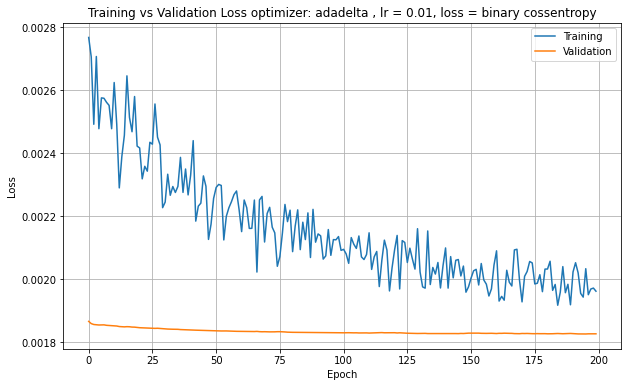

In [51]:
model_1 = KMP1(X_train.shape[1])
model_1.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_1.plot_training()

### Evaluate

In [52]:
model_1.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.66      1.00      0.80 6.084247619448123
           1       0.35      0.00      0.00 3.1096750530852217

    accuracy                           0.66 9.193922672533345
   macro avg       0.51      0.50      0.40 9.193922672533345
weighted avg       0.56      0.66      0.53 9.193922672533345

[[6.07468317e+00 9.56445321e-03]
 [3.10445703e+00 5.21802797e-03]]


## Keras Model Pro 2
Optimizer adagrad, learning rate 0.01, loss binary crossentropy

In [27]:
#weighted neural network v1
class KMP2(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(64, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP2"

In [48]:
### Train

In [ ]:
#seed 1
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region="SR", tag=1, seed = 1)

10
Epoch 23/200
9097/9097 [==============================] - 1s 95us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 1s 93us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 25/200
9097/9097 [==============================] - 1s 98us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 26/200
9097/9097 [==============================] - 1s 96us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 27/200
9097/9097 [==============================] - 1s 99us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 28/200
9097/9097 [==============================] - 1s 93us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 29/200
9097/9097 [==============================] - 1s 93us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 30/200
9097/9097 [==============================] - 1s 93us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 31/200
9097/9097 [==============================] - 1s 92us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 32/200
9097/9097 [============================

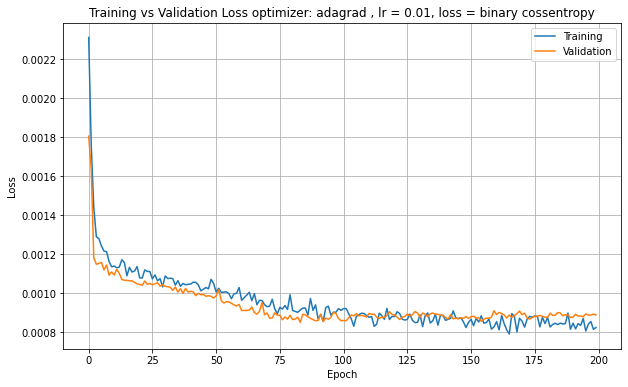

In [28]:
model_2 = KMP2(X_train.shape[1])
model_2.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_2.plot_training()

### Evaluate

In [36]:
model_2.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.93      0.79      0.85 6.084247619448123
           1       0.68      0.89      0.77 3.1096750530852217

    accuracy                           0.82 9.193922672533345
   macro avg       0.81      0.84      0.81 9.193922672533345
weighted avg       0.85      0.82      0.82 9.193922672533345

[[4.77906094 1.30518668]
 [0.34430754 2.76536751]]


In [29]:
model_2.save(data_path, "1")

modelo
modelo
historia
mas historia


### Training 2

In [54]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)

/200
9097/9097 [==============================] - 1s 80us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 19/200
9097/9097 [==============================] - 1s 82us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 20/200
9097/9097 [==============================] - 1s 82us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 21/200
9097/9097 [==============================] - 1s 80us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 22/200
9097/9097 [==============================] - 1s 81us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 23/200
9097/9097 [==============================] - 1s 83us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 1s 81us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 25/200
9097/9097 [==============================] - 1s 80us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 26/200
9097/9097 [==============================] - 1s 80us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 27/200
9097/9097 [==============================] - 1s 82

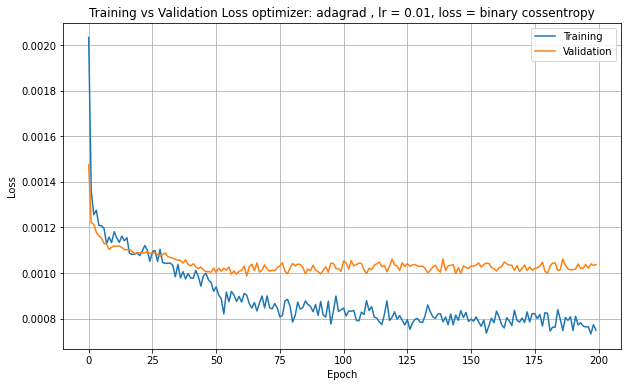

In [31]:
model_22 = KMP2(X_train.shape[1])
model_22.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_22.plot_training()

### Evaluate 2

In [38]:
model_22.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.92      0.82      0.87 4.736367214691252
           1       0.77      0.88      0.82 3.088324681134691

    accuracy                           0.85 7.824691895825943
   macro avg       0.84      0.85      0.84 7.824691895825943
weighted avg       0.86      0.85      0.85 7.824691895825943

[[3.90532605 0.83104117]
 [0.35526284 2.73306184]]


In [53]:
model_22.save(data_path, "2")

modelo
modelo
historia
mas historia


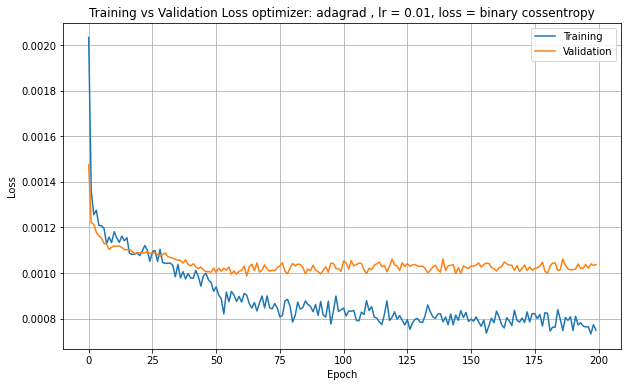

In [59]:
loaded_model_22 = KMP2(X_train.shape[1])
loaded_model_22.load(data_path, "2")
loaded_model_22.plot_training()

## Keras Model Pro 3 (The best yet)
More neurones per layer

In [61]:
#weighted neural network v1
class KMP3(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(128, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(512, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP3"

In [62]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)

ch 20/200
9097/9097 [==============================] - 2s 220us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 21/200
9097/9097 [==============================] - 2s 213us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 22/200
9097/9097 [==============================] - 2s 216us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 23/200
9097/9097 [==============================] - 2s 216us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 2s 214us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 25/200
9097/9097 [==============================] - 2s 228us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 26/200
9097/9097 [==============================] - 2s 217us/step - loss: 9.6460e-04 - val_loss: 0.0011
Epoch 27/200
9097/9097 [==============================] - 2s 215us/step - loss: 9.8930e-04 - val_loss: 0.0010
Epoch 28/200
9097/9097 [==============================] - 2s 218us/step - loss: 9.4622e-04 - val_loss: 0.0010
Epoch 29/200
9097/9097 [=============

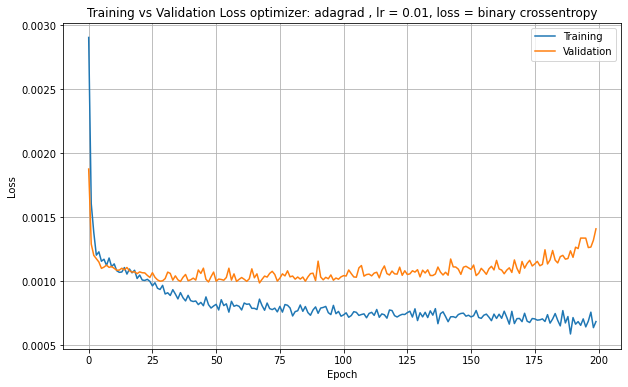

In [63]:
model_3 = KMP3(X_train.shape[1])
model_3.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_3.plot_training()

In [64]:
model_3.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.93      0.84      0.88 4.736367214691252
           1       0.78      0.90      0.84 3.088324681134691

    accuracy                           0.86 7.824691895825943
   macro avg       0.86      0.87      0.86 7.824691895825943
weighted avg       0.87      0.86      0.86 7.824691895825943

[[3.96633187 0.77003535]
 [0.29835331 2.78997138]]


In [70]:
model_3.save(data_path, "1")

modelo
modelo
historia
mas historia


## Keras Model Pro 4
Less neurones per layer

In [67]:
#weighted neural network v1
class KMP4(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(32, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(32, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP4"

===================] - 1s 72us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 16/200
9097/9097 [==============================] - 1s 70us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 17/200
9097/9097 [==============================] - 1s 70us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 18/200
9097/9097 [==============================] - 1s 78us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 19/200
9097/9097 [==============================] - 1s 85us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 20/200
9097/9097 [==============================] - 1s 76us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 21/200
9097/9097 [==============================] - 1s 66us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 22/200
9097/9097 [==============================] - 1s 67us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 23/200
9097/9097 [==============================] - 1s 62us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 1s 60us/step - loss: 0.0011 - va

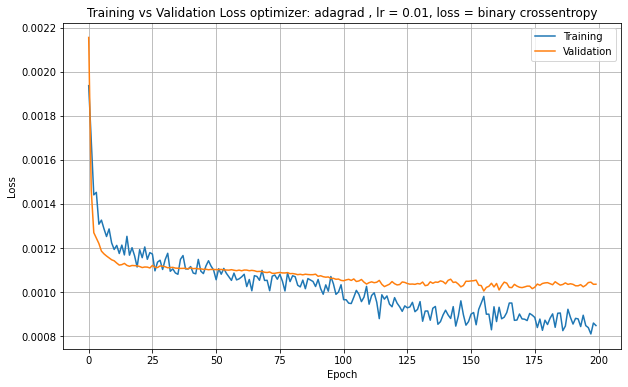

In [68]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)
model_4 = KMP4(X_train.shape[1])
model_4.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_4.plot_training()

In [69]:
model_4.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.92      0.80      0.86 4.736367214691252
           1       0.74      0.90      0.81 3.088324681134691

    accuracy                           0.84 7.824691895825943
   macro avg       0.83      0.85      0.84 7.824691895825943
weighted avg       0.85      0.84      0.84 7.824691895825943

[[3.78625527 0.95011194]
 [0.31897119 2.76935349]]


Train on 9097 samples, validate on 3033 samples
Epoch 1/100
9097/9097 [==============================] - 1s 118us/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/100
9097/9097 [==============================] - 1s 76us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/100
9097/9097 [==============================] - 1s 70us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/100
9097/9097 [==============================] - 1s 73us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
9097/9097 [==============================] - 1s 68us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
9097/9097 [==============================] - 1s 62us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
9097/9097 [==============================] - 1s 65us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
9097/9097 [==============================] - 1s 60us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
9097/9097 [==============================] - 1s 60us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
90

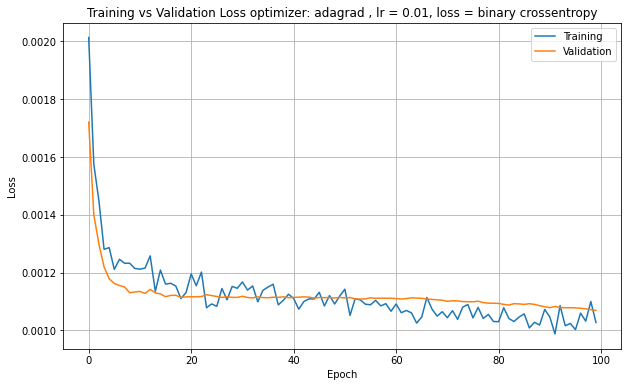

In [71]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)
model_42 = KMP4(X_train.shape[1])
model_42.fit(X_train, y_train, w_train, X_val, y_val, w_val, 100)
model_42.plot_training()

In [72]:
model_42.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.93      0.83      0.87 4.736367214691252
           1       0.77      0.90      0.83 3.088324681134691

    accuracy                           0.86 7.824691895825943
   macro avg       0.85      0.86      0.85 7.824691895825943
weighted avg       0.87      0.86      0.86 7.824691895825943

[[3.91343526 0.82293196]
 [0.30394591 2.78437877]]


In [73]:
model_42.save(data_path, "2")

modelo
modelo
historia
mas historia


## Keras Model Pro 5
More neurones in final layers

In [83]:
#weighted neural network v1
class KMP5(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(32, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(512, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP5"


Epoch 18/200
9097/9097 [==============================] - 1s 133us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 19/200
9097/9097 [==============================] - 1s 136us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 20/200
9097/9097 [==============================] - 1s 131us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 21/200
9097/9097 [==============================] - 1s 155us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 22/200
9097/9097 [==============================] - 2s 167us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 23/200
9097/9097 [==============================] - 2s 167us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 1s 157us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 25/200
9097/9097 [==============================] - 1s 150us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 26/200
9097/9097 [==============================] - 1s 144us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 27/200
9097/9097 [=====================

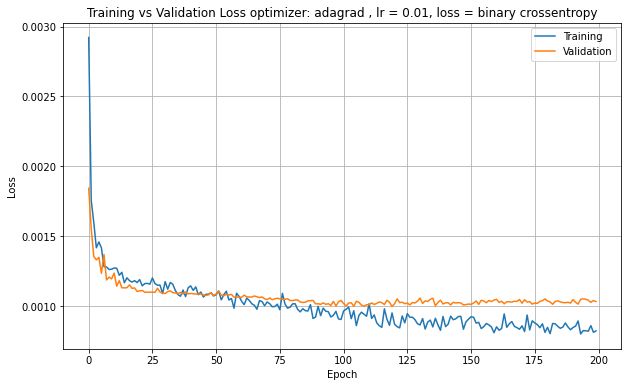

In [84]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)
model_5 = KMP5(X_train.shape[1])
model_5.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_5.plot_training()

In [85]:
model_5.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.92      0.79      0.85 4.736367214691252
           1       0.74      0.89      0.81 3.088324681134691

    accuracy                           0.83 7.824691895825943
   macro avg       0.83      0.84      0.83 7.824691895825943
weighted avg       0.85      0.83      0.83 7.824691895825943

[[3.75979021 0.976577  ]
 [0.32920395 2.75912073]]


## Keras Model Pro 6

In [78]:
#weighted neural network v1
class KMP6(KerasModelPro):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(128, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(512, kernel_initializer='uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.01), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.01, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMP6"

=========] - 2s 176us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 20/200
9097/9097 [==============================] - 2s 170us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 21/200
9097/9097 [==============================] - 1s 163us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 22/200
9097/9097 [==============================] - 2s 170us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 23/200
9097/9097 [==============================] - 2s 171us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 24/200
9097/9097 [==============================] - 2s 166us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 25/200
9097/9097 [==============================] - 2s 166us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 26/200
9097/9097 [==============================] - 1s 165us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 27/200
9097/9097 [==============================] - 2s 167us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 28/200
9097/9097 [==============================] - 2s 166us/step - loss: 0.0010 - va

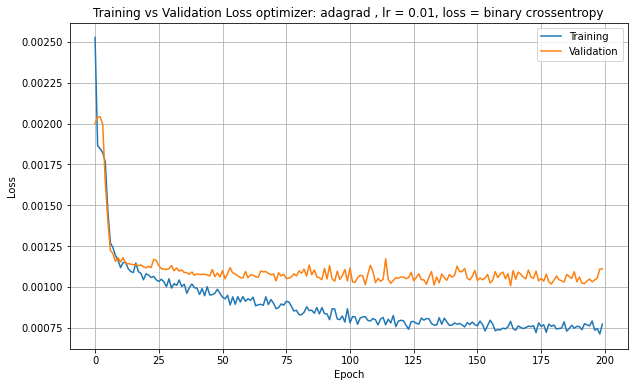

In [81]:
#seed 42
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = ada.get_trainvaltest_from_dataset(data_path, signal, region = "SR", tag = 1, seed = 42)
model_6 = KMP6(X_train.shape[1])
model_6.fit(X_train, y_train, w_train, X_val, y_val, w_val, 200)
model_6.plot_training()

In [82]:
model_6.evaluate(X_test, y_test, w_test)

precision    recall  f1-score   support

           0       0.93      0.82      0.87 4.736367214691252
           1       0.76      0.90      0.83 3.088324681134691

    accuracy                           0.85 7.824691895825943
   macro avg       0.85      0.86      0.85 7.824691895825943
weighted avg       0.86      0.85      0.85 7.824691895825943

[[3.86296077 0.87340645]
 [0.29649669 2.79182799]]
